In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses

# Matplotlib configuration
legend_size = 14

# Activation function $\sigma(z)$
\begin{array}{c|c|c|c}
  \text{Threshold} & \text{ReLU} & \text{Leaky ReLU} & \text{Sigmoid} & \text{Hyperbolic tangent} \\
  \hline
  \mathbb{I}\{z\ge 0\} & \max\{z, 0\} & \max\{z, \alpha z\} & \frac{1}{1+e^{-z}} & \tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}} \\
\end{array}

These and even more activation functions are already implemented in the ``tf.keras.activations`` module (read the official documentation [here](https://keras.io/api/layers/activations/)).

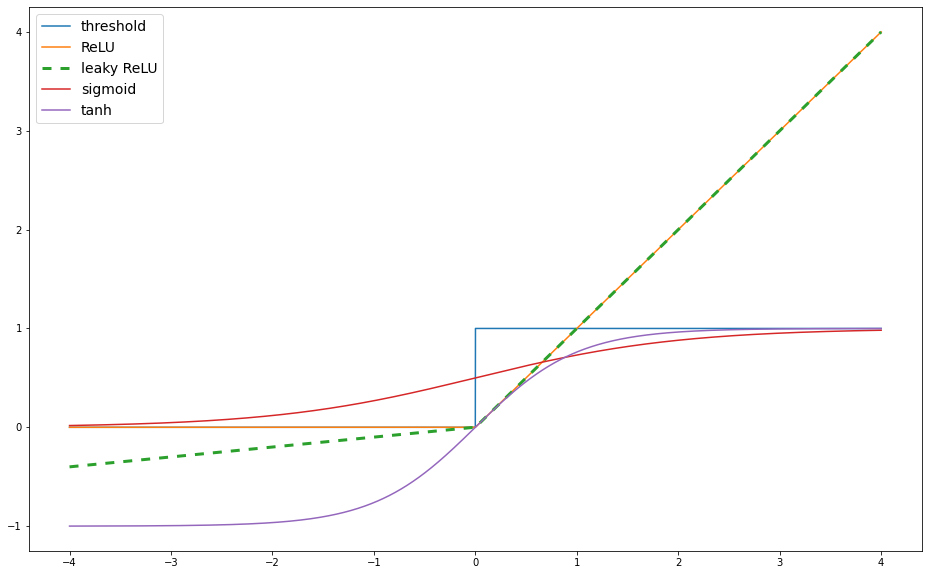

In [2]:
def threshold(z):
    return 1 if z > 0 else 0

x = np.linspace(-4, 4, 10000)
plt.figure(figsize=(16, 10))
plt.plot(x, list(map(threshold, x)), label="threshold")
plt.plot(x, activations.relu(x), label="ReLU")
plt.plot(x, activations.relu(x, alpha=0.1), "--", dashes=(3, 3), linewidth=3, label="leaky ReLU")
plt.plot(x, activations.sigmoid(x), label="sigmoid")
plt.plot(x, activations.tanh(x), label="tanh")
plt.legend(fontsize=legend_size)
plt.show()

# The MNIST dataset

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print('Train images shape:', train_images.shape)
print('Test images shape: ', test_images.shape)

Train images shape: (60000, 28, 28)
Test images shape:  (10000, 28, 28)


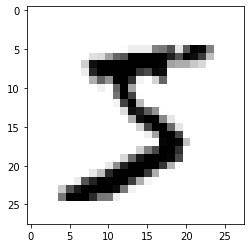

In [5]:
plt.imshow(train_images[0], cmap=plt.cm.gray_r)
plt.grid(False)
plt.show()

### Preprocessing

We need to rescale the value contained in each pixel for all images in our training and test sets, so that the range of possible pixel values changes from integers in $[0, 255]$ to standardized values in $[0, 1]$.
We can do as follows:

In [6]:
train_images = train_images / 255
test_images = test_images / 255

Alternatively, we can introduce an initial rescaling layer (i.e., `tf.keras.layers.Rescaling(1./255)`) in the model.

The following function performes the above steps on the MNIST dataset.

In [7]:
def load_mnist(conv=False, verbose=True):
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images / 255
    test_images = test_images / 255
    if conv:
        train_images = np.expand_dims(train_images, -1)
        test_images = np.expand_dims(test_images, -1)
    if verbose:
        print("Train images shape:", train_images.shape)
        print("Test images shape: ", test_images.shape)
    return (train_images, train_labels), (test_images, test_labels)

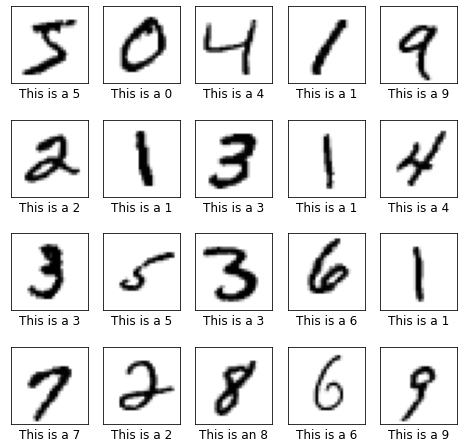

In [8]:
plt.figure(figsize=(8, 8))
grid_shape = (4, 5)
for i in range(grid_shape[0] * grid_shape[1]):
    plt.subplot(*grid_shape, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray_r)
    plt.xlabel(f'This is a{"n" if train_labels[i] == 8 else ""} {train_labels[i]}', size=12)
plt.show()

# Multilayer Neural Network

The neural network model can be instantiated via the class `tf.keras.Sequential`.
The layers that can be used for building a model belong to the `tf.keras.layers` module.

In [9]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


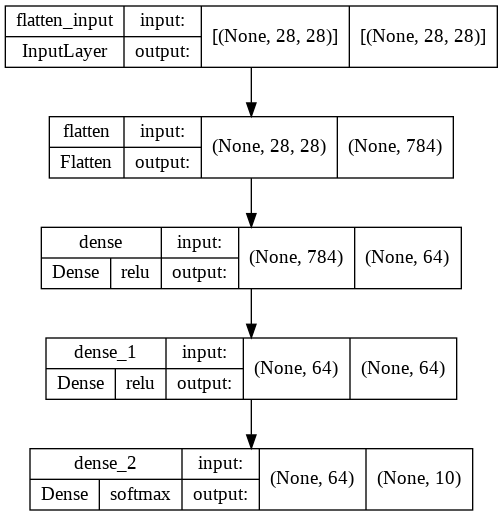

In [10]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [11]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

## Training

In [12]:
BATCH_SIZE = 120
EPOCHS = 20

In [13]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
500/500 [==============================] - 6s 9ms/step - loss: 0.3933 - accuracy: 0.8880 - val_loss: 0.1952 - val_accuracy: 0.9412
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 0.1696 - accuracy: 0.9511 - val_loss: 0.1415 - val_accuracy: 0.9567
Epoch 3/20
500/500 [==============================] - 2s 5ms/step - loss: 0.1246 - accuracy: 0.9626 - val_loss: 0.1162 - val_accuracy: 0.9639
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9702 - val_loss: 0.1047 - val_accuracy: 0.9677
Epoch 5/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0820 - accuracy: 0.9749 - val_loss: 0.1007 - val_accuracy: 0.9686
Epoch 6/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0986 - val_accuracy: 0.9690
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0895 - val_accuracy: 0.9741
Epoch 

## Performance evaluation

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.1054 - accuracy: 0.9761 - 410ms/epoch - 1ms/step


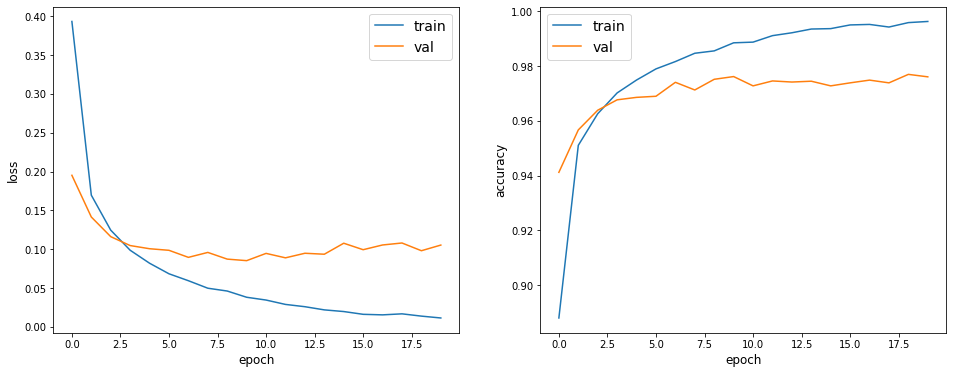

In [15]:
def performance_plot(history):
    plt.figure(figsize=(16, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=legend_size)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=legend_size)

    plt.show()

performance_plot(history)

In [16]:
predict_img = np.expand_dims(test_images[0], 0)
print("Prediction batch shape:", predict_img.shape)
prediction = model.predict(predict_img)
print("Prediction output:", prediction[0])

true_label = test_labels[0]
predicted_label = np.argmax(prediction)
print(f"\nPredicted label:", predicted_label, "\tTrue label:", true_label)

Prediction batch shape: (1, 28, 28)
Prediction output: [2.4524532e-10 6.2145267e-12 1.7267153e-09 7.8745654e-07 2.0444257e-16
 4.7057730e-13 3.1697646e-18 9.9999905e-01 1.3506871e-13 9.6930464e-08]

Predicted label: 7 	True label: 7


# Convolutional Neural Network (CNN)

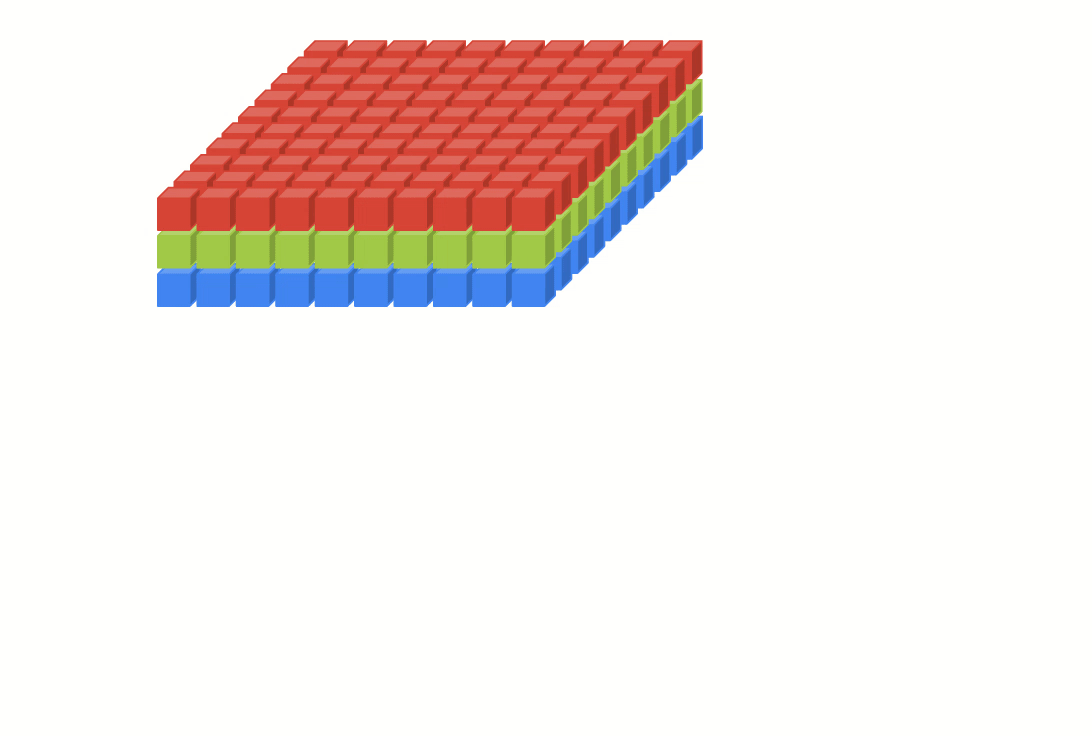

(animation taken from the "Tensorflow and deep learning without a PhD" series by Martin Gorner, which can be found [here](https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd))

In [17]:
(train_images, train_labels), (test_images, test_labels) = load_mnist(conv=True)
input_shape = train_images[0].shape

Train images shape: (60000, 28, 28, 1)
Test images shape:  (10000, 28, 28, 1)


In [18]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)), # Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), # Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5), # Dropout
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Dropout
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

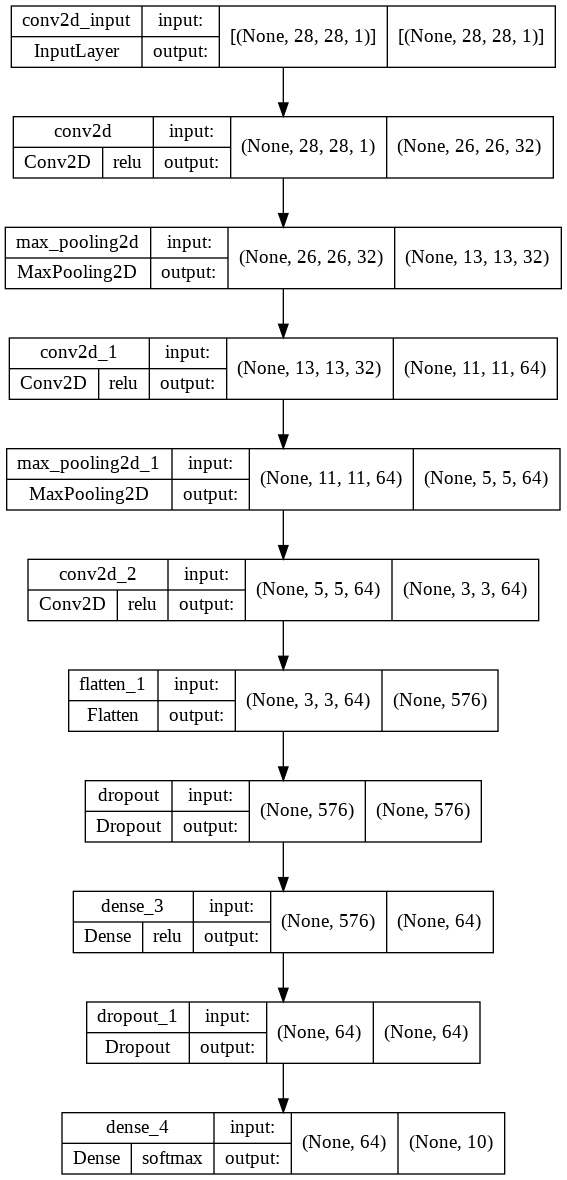

In [19]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [20]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [21]:
EPOCHS = 10
history = model.fit(
    train_images,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.08
)

Epoch 1/10
460/460 [==============================] - 46s 99ms/step - loss: 0.5036 - accuracy: 0.8398 - val_loss: 0.0697 - val_accuracy: 0.9802
Epoch 2/10
460/460 [==============================] - 46s 100ms/step - loss: 0.1570 - accuracy: 0.9554 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 3/10
460/460 [==============================] - 45s 99ms/step - loss: 0.1137 - accuracy: 0.9676 - val_loss: 0.0415 - val_accuracy: 0.9881
Epoch 4/10
460/460 [==============================] - 46s 101ms/step - loss: 0.0943 - accuracy: 0.9733 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 5/10
460/460 [==============================] - 45s 98ms/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.0435 - val_accuracy: 0.9890
Epoch 6/10
460/460 [==============================] - 45s 99ms/step - loss: 0.0701 - accuracy: 0.9801 - val_loss: 0.0315 - val_accuracy: 0.9898
Epoch 7/10
460/460 [==============================] - 47s 102ms/step - loss: 0.0646 - accuracy: 0.9821 - val_loss: 0.0286 - val_accura

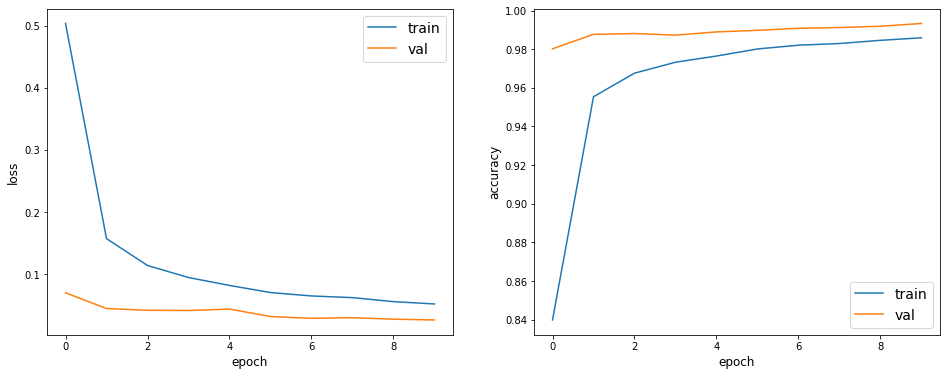

In [22]:
performance_plot(history)

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.0190 - accuracy: 0.9943 - 3s/epoch - 10ms/step


In [24]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

1875/1875 - 18s - loss: 0.0148 - accuracy: 0.9957 - 18s/epoch - 10ms/step


# Additional resources

Refer to the official Tensorflow documentation ([here](https://www.tensorflow.org/tutorials)) for further learning about its tools and capabilities such as:
- saving and loading models ([here](https://www.tensorflow.org/tutorials/keras/save_and_load));
- hyperparameter tuning ([here](https://www.tensorflow.org/tutorials/keras/keras_tuner));
- handling overfitting and underfitting ([here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)).